<a href="https://colab.research.google.com/github/sk-choi/Yangjae_AI/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

albumentations를 이용한 이미지데이터 증강

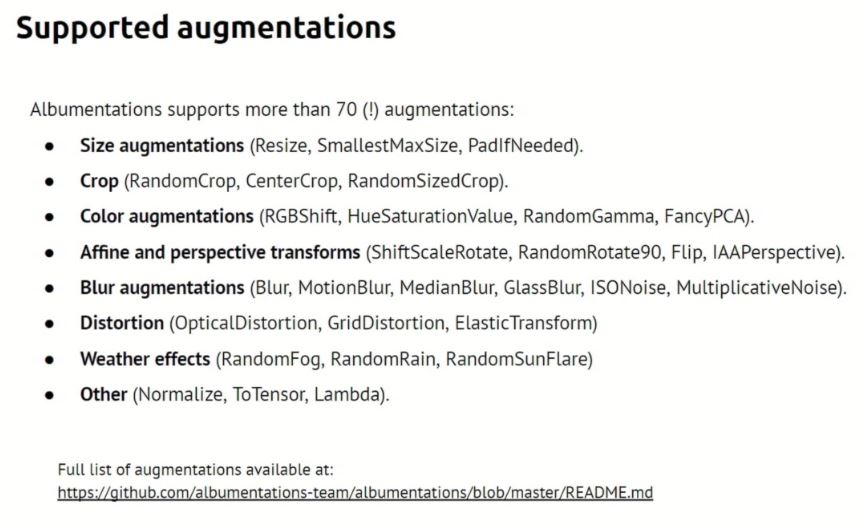

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


이번 코드에서 사용된 사진 두 가지

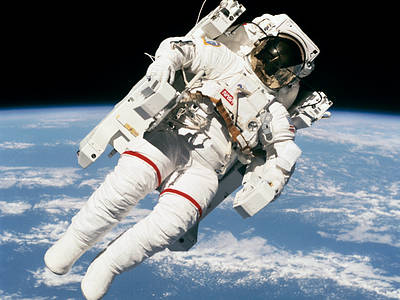


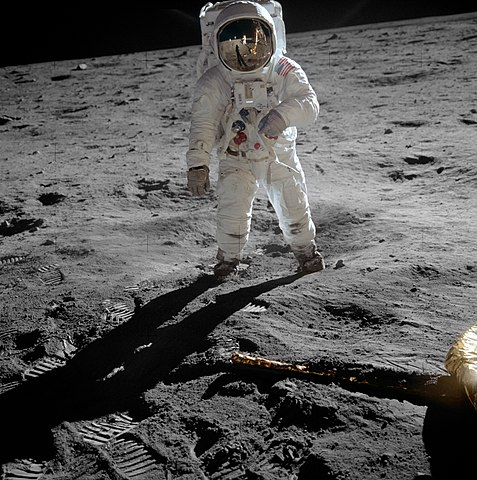




In [ ]:
import albumentations as A
import cv2

img = cv2.imread('/content/gdrive/MyDrive/images/astronaut01.jpg')
mask = cv2.imread("/content/gdrive/MyDrive/images/astronaut02.jpg")

height = 150
width = 300
transform = A.Compose([
    A.Resize(height=height, width = width),
    A.RandomResizedCrop(height=height, width=width, scale=(0.3, 1.0)) #랜덤 사이즈로 크롭
])

augmentations = transform(image = img, mask = mask)
augmentation_img = augmentations['image']
augmentation_mask = augmentations['mask']

cv2.imwrite('img_austronaut.jpg', augmentation_img)
cv2.imwrite('mask_austronaut.jpg', augmentation_mask)

True

(150, 300, 3)
<class 'numpy.ndarray'>


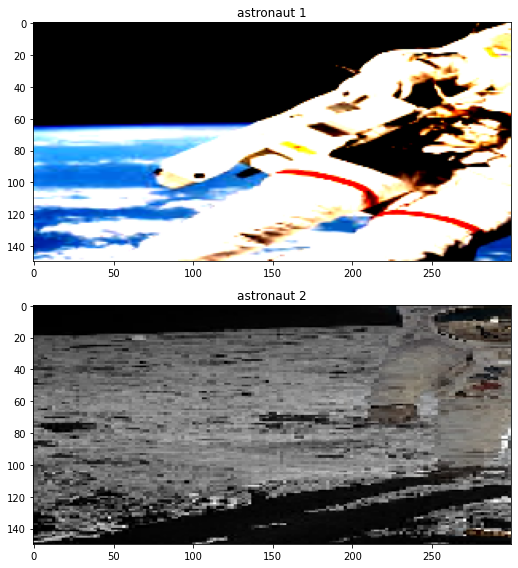

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import numpy as np

image = cv2.imread('/content/gdrive/MyDrive/images/astronaut01.jpg')
mask = cv2.imread('/content/gdrive/MyDrive/images/astronaut02.jpg')

height = 150
width = 300

#Normalize는 입력 받은 이미지 값의 범위를 (0, 255) → (-1, 1) 범위로 줄여주는 역할을 합니다. 
#이와 같이 하는 이유는 입력 값의 범위를 줄여줌으로써 학습이 빨리 수렴되게 하고 특정 입력값이 커짐으로써 
#특정 weight값이 커지는 문제를 개선할 수 있기 때문입니다

transform = A.Compose([
    A.Normalize(),
    A.Resize(height = height, width = width),
    A.RandomResizedCrop(height = height, width = width, scale = (0.3, 1.0)),
])

augmentations = transform(image = image, mask = mask)
augmentation_img = augmentations["image"]
augmentation_mask = augmentations["mask"]

print(augmentation_img.shape)
print(type(augmentation_img))
images = [augmentation_img, augmentation_mask]
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for index in range(len(images)):
    plt.subplot(2,1,index + 1)
    images[index] = cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB) 
    plt.imshow(images[index])
    plt.title('astronaut %d' % (index + 1))
    plt.tight_layout()
plt.show()

(50, 50, 3)
<class 'numpy.ndarray'>


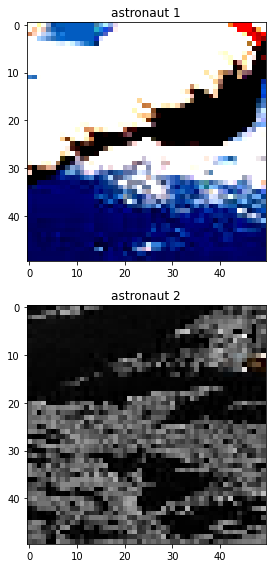

In [ ]:
image = cv2.imread('/content/gdrive/MyDrive/images/astronaut01.jpg')
mask = cv2.imread('/content/gdrive/MyDrive/images/astronaut02.jpg')

height = 150
width = 300

transform = A.Compose([
    A.Normalize(),
    A.Resize(height = height, width = width),
    A.Crop(x_min = 100, y_min = 100, x_max = 150, y_max = 150) #이미지 크롭
])

augmentations = transform(image = image, mask = mask)
augmentation_img = augmentations["image"]
augmentation_mask = augmentations["mask"]

print(augmentation_img.shape)
print(type(augmentation_img))
images = [augmentation_img, augmentation_mask]
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for index in range(len(images)):
    plt.subplot(2,1,index + 1)
    images[index] = cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB) 
    plt.imshow(images[index])
    plt.title('astronaut %d' % (index + 1))
    plt.tight_layout()
plt.show()

(50, 50, 3)
<class 'numpy.ndarray'>


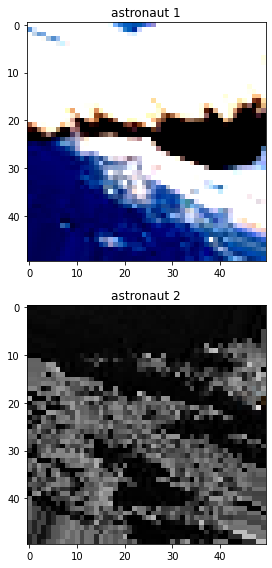

In [ ]:
image = cv2.imread('/content/gdrive/MyDrive/images/astronaut01.jpg')
mask = cv2.imread('/content/gdrive/MyDrive/images/astronaut02.jpg')

height = 150
width = 300

transform = A.Compose([
    A.Normalize(),
    A.Resize(height = height, width = width),
    A.Crop(x_min = 100, y_min = 100, x_max = 150, y_max = 150),
    A.Rotate(limit=90, p=1, border_mode=cv2.BORDER_REPLICATE) #회전
])

augmentations = transform(image = image, mask = mask)
augmentation_img = augmentations["image"]
augmentation_mask = augmentations["mask"]

print(augmentation_img.shape)
print(type(augmentation_img))
images = [augmentation_img, augmentation_mask]
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for index in range(len(images)):
    plt.subplot(2,1,index + 1)
    images[index] = cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB) 
    plt.imshow(images[index])
    plt.title('astronaut %d' % (index + 1))
    plt.tight_layout()
plt.show()

(150, 300, 3)
<class 'numpy.ndarray'>


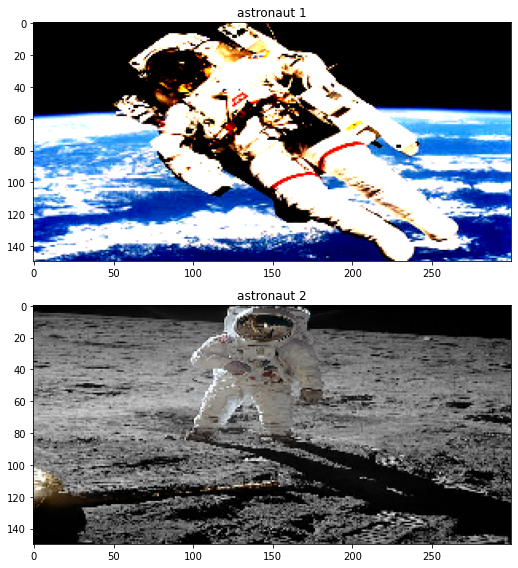

In [ ]:
#HorizontalFlip(p=0.5)
image = cv2.imread('/content/gdrive/MyDrive/images/astronaut01.jpg')
mask = cv2.imread('/content/gdrive/MyDrive/images/astronaut02.jpg')

height = 150
width = 300

transform = A.Compose([
    A.Normalize(),
    A.Resize(height = height, width = width),
    A.HorizontalFlip(p=1) #좌우 반전
])

augmentations = transform(image = image, mask = mask)
augmentation_img = augmentations["image"]
augmentation_mask = augmentations["mask"]

print(augmentation_img.shape)
print(type(augmentation_img))
images = [augmentation_img, augmentation_mask]
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for index in range(len(images)):
    plt.subplot(2,1,index + 1)
    images[index] = cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB) 
    plt.imshow(images[index])
    plt.title('astronaut %d' % (index + 1))
    plt.tight_layout()
plt.show()


In [ ]:
A.__version__

'0.5.2'

In [ ]:
!pip install --upgrade albumentations 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 116 kB 7.4 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.5.2
    Uninstalling albumentations-0.5.2:
      Successfully uninstalled albumentations-0.5.2
